# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

### Загрузка данных

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
print(data_0.shape)
print(data_1.shape)
data_2.shape

(100000, 5)
(100000, 5)


(100000, 5)

In [4]:
def basic_data_info(data):
    print('Первые пять строк:')
    print(data.head())
    print('\nИнформация:')
    print(data.info())
    print('\nНаличие пропусков:')
    print(data.isna().sum())
    print('\nНаличие дубликатов:')
    print(data.duplicated().sum())
    print('\nСтатистическое описание данных:')
    print(data.describe())

In [5]:
basic_data_info(data_0)

Первые пять строк:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Наличие пропусков:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Наличие дубликатов:
0

Статистическое описание данных:
                  f0             f1             f2        product
cou

In [6]:
basic_data_info(data_1)

Первые пять строк:
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Наличие пропусков:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Наличие дубликатов:
0

Статистическое описание данных:
                  f0             f1             f2       

In [7]:
basic_data_info(data_2)

Первые пять строк:
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746

Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Наличие пропусков:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Наличие дубликатов:
0

Статистическое описание данных:
                  f0             f1             f2        product
cou

Мы загрузили данные по трем регионам в три датафрейма `data_0`, `data_1`, `data_2`. В каждом датафрейме было по 100000 строк-наблюдений. В датафреймах есть 5 колонок. В колонке `id` записаны строковые данные, в колонках `f0`, `f1`, `f2` и `product` - численные данные типа `float64`. В данных нет пропусков и дубликатов.

### Подготовка данных

Целевой переменной в данных является `product`, а признаки содержатся в колонках `f0`, `f1`, `f2`. Колонка `id` отвечает за уникальный идентификатор месторождения и не будет участвовать в обучении.

In [8]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [9]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [10]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Среди признаков нет категориальных, то есть нам не нужно выполнять преобразование категориальных признаков в численные. Также кажется, что нет необходимости масштабировать признаки, т.к. значения имеют схожий масштаб.

<small>Можно было бы масштабировать признаки для региона 1, но это никак не повлияет на результаты.</small>

Посмотрим на матрицы корреляции признаков.

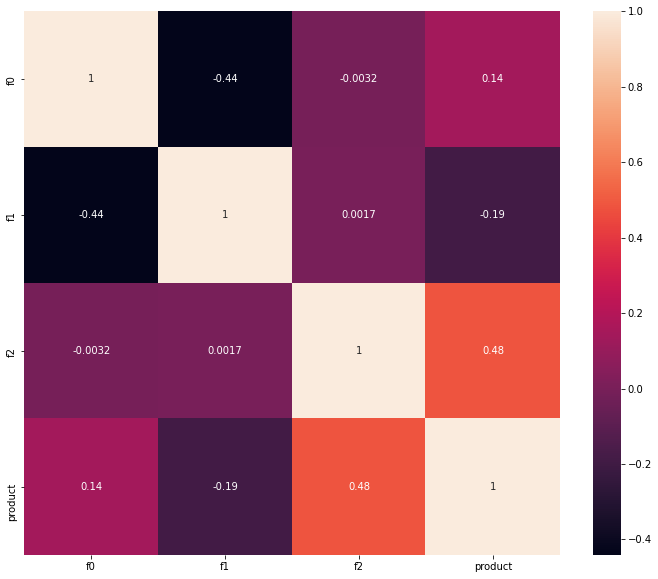

In [11]:
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(data_0[['f0', 'f1', 'f2', 'product']].corr(), annot=True)
plt.show()

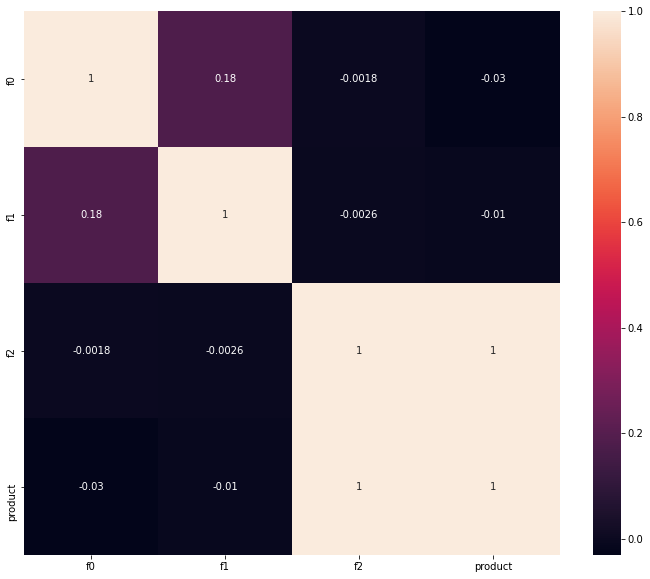

In [12]:
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(data_1[['f0', 'f1', 'f2', 'product']].corr(), annot=True)
plt.show()

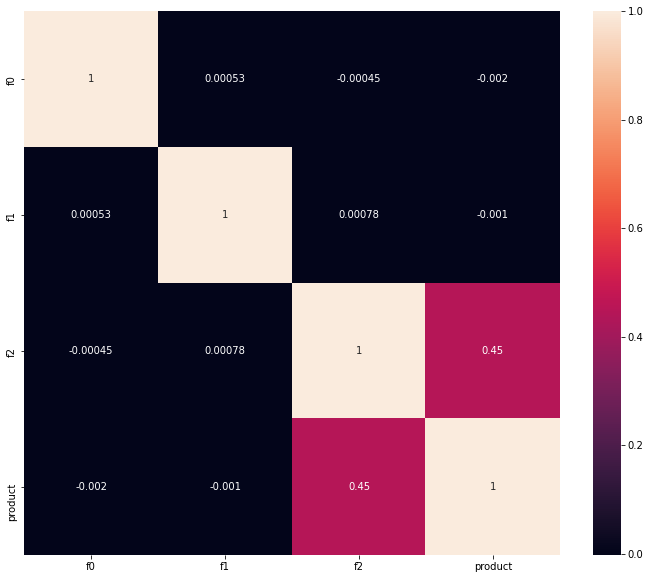

In [13]:
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(data_2[['f0', 'f1', 'f2', 'product']].corr(), annot=True)
plt.show()

Видим, что больше всего с целевым признаком `product` коррелирует признак `f2`. В регионе 1 коэффициент корреляции между этими признаками оказался равен 1. Друг с другом признаки почти не коррелируют, т.к. мы не сталкиваемся с проблемой мультиколлинеарности признаков.

Разделим наши данные на признаки для обучения и целевую переменную.

In [14]:
target_0 = data_0['product']
target_1 = data_1['product']
target_2 = data_2['product']

In [15]:
features_0 = data_0.drop(['product', 'id'], axis=1)
features_1 = data_1.drop(['product', 'id'], axis=1)
features_2 = data_2.drop(['product', 'id'], axis=1)

In [16]:
print(target_0.shape)
print(features_0.shape)
print(target_1.shape)
print(features_1.shape)
print(target_2.shape)
print(features_2.shape)

(100000,)
(100000, 3)
(100000,)
(100000, 3)
(100000,)
(100000, 3)


Итак, мы выделили в данных целевую переменную (колонка `product`) и признаки (колонки `f0`, `f1`, `f2`). Так как все данные являются числовыми, то не было необходимости преобразовывать категориальные признаки. Также было принято решение не масштабировать признаки, т.к. они имеют сравнимый масштаб. Между признаками не был ообнаружено сильной корреляции, т.е. отобранные признаки не являются мультиколлинеарными. 

## Обучение и проверка модели

### Разбиение данных на обучающую и валидационную выборки
Для разбиения данных на обучающую и валидационную выборки в отношении 3:1 (75%:25%) используем функцию `train_test_split` библиотеки `sklearn`.

In [17]:
features_0_train, features_0_valid, target_0_train, target_0_valid = train_test_split(
    features_0, target_0, test_size=0.25, random_state=1)

In [18]:
for df in [features_0_train, target_0_train, features_0_valid, target_0_valid]:
    print(df.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


In [19]:
features_1_train, features_1_valid, target_1_train, target_1_valid = train_test_split(
    features_1, target_1, test_size=0.25, random_state=1)

In [20]:
for df in [features_1_train, target_1_train, features_1_valid, target_1_valid]:
    print(df.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


In [21]:
features_2_train, features_2_valid, target_2_train, target_2_valid = train_test_split(
    features_2, target_2, test_size=0.25, random_state=1)

In [22]:
for df in [features_2_train, target_2_train, features_2_valid, target_2_valid]:
    print(df.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


### Обучение модели
Мы будем обучать модель линейной регрессии для каждого региона.

In [23]:
# функция для обучения модели и распечатки результатов
def train_model(features_train, target_train, features_valid, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    # делаем предсказания на валидационной выборке
    predict_valid = model.predict(features_valid)
    print(f'Средний запас предсказанного сырья: {predict_valid.mean()} тыс. баррелей')
    rmse = mean_squared_error(target_valid, predict_valid, squared=False)
    print('RMSE =', rmse)
    # Проверим наши результаты на вменяемость: 
    # сравним полученную оценку RMSE с оценкой модели, которая всегда бы предсказывала среднее значение.
    predictions = pd.Series(target_train.mean(), index=target_valid.index)
    print("RMSE модели, всегда предсказывающей среднее значение:", mean_squared_error(target_valid, predictions, squared=False))
    return model, predict_valid
    
    

#### Регион 0

In [24]:
model_0, predict_0_valid = train_model(features_0_train, target_0_train, features_0_valid, target_0_valid)

Средний запас предсказанного сырья: 92.49262459838863 тыс. баррелей
RMSE = 37.74258669996437
RMSE модели, всегда предсказывающей среднее значение: 44.39642247576803


Таким образом, обученная модель справляется с задачей лучше, чем модель, которая всегда предсказывает среднее значение.

#### Регион 1

In [25]:
model_1, predict_1_valid = train_model(features_1_train, target_1_train, features_1_valid, target_1_valid)

Средний запас предсказанного сырья: 69.12040524285558 тыс. баррелей
RMSE = 0.8943375629130574
RMSE модели, всегда предсказывающей среднее значение: 46.00964987972865


Обученная модель справляется намного лучше, чем модель, предсказывающая среднее значение. Значение метрики RMSE оказалось очень низким, модель почти не ошибается: видели, что целевой признак очень сильно коррелирует с признаком `f2`, поэтому это ожидаемый результат.

#### Регион 2

In [26]:
model_2, predict_2_valid = train_model(features_2_train, target_2_train, features_2_valid, target_2_valid)

Средний запас предсказанного сырья: 94.9568304858529 тыс. баррелей
RMSE = 39.86671127773423
RMSE модели, всегда предсказывающей среднее значение: 44.57448099401238


Обученная модель справляется с задачей лучше, чем модель, предсказывающая среднее значение.

Мы обучили три модели для трех регионов. Модели для всех регионов отрабатывают лучше, чем модель, предсказывающая среднее значение, и наилучшей предсказательной силой обладает модель для региона 1.

## Подготовка к расчёту прибыли

Сохраним ключевые значения в отдельных переменных.

In [27]:
budget = 10 ** 10 # бюджет на разработку региона
price = 450_000 # доход с единицы продукта 
n = 200 # количество скважин, выбираемых для разработки

Если по условию задачи в регионе выбираются 200 скважин для разработки, а бюджет на разработку равен 10 млрд рублей, то достаточный объем сырья для разработки новой скважины мы можем рассчитать по формуле $volume = {budget \over (n * price)}$.

In [28]:
min_volume = budget / (n * price)

In [29]:
min_volume

111.11111111111111

Сравним полученный объем с средним запасом в каждом регионе.

In [30]:
def compare_volumes(min_volume, mean_volume):
    if mean_volume >= min_volume:
        print(f'Средний запас сырья в регионе, равный {mean_volume}, не меньше достаточного объема для безубыточной разработки новой скважины.')
    else:
        print(f'Средний запас сырья в регионе, равный {mean_volume}, меньше достаточного объема для безубыточной разработки новой скважины.')

In [31]:
for i, df in enumerate([data_0, data_1, data_2]):
    print(f'Регион {i}')
    compare_volumes(min_volume, df['product'].mean())
    print()

Регион 0
Средний запас сырья в регионе, равный 92.50000000000001, меньше достаточного объема для безубыточной разработки новой скважины.

Регион 1
Средний запас сырья в регионе, равный 68.82500000000002, меньше достаточного объема для безубыточной разработки новой скважины.

Регион 2
Средний запас сырья в регионе, равный 95.00000000000004, меньше достаточного объема для безубыточной разработки новой скважины.



Таким образом, средний объем сырья во всех трех регионах меньше минимального достаточного для безубыточной разработки новой скважины.

Напишем функцию расчета прибыли.

In [32]:
def calculate_profit(target, predictions, n=n, price=price, budget=budget):
    # сбрасываем индексы, т.к. мы используем бутстрап с возвращением и при подстановке индексов можем получить более 200 скважин
    target = target.reset_index(drop=True)
    predictions = predictions.reset_index(drop=True)
    # выбираем скважины с максимальными предсказаниями
    best_predictions = predictions.sort_values(ascending=False)[:n]
    # находим целевые значения объёма сырья, соответствующие этим предсказаниям
    best_target = target.loc[best_predictions.index]
    # суммируем целевые значения
    best_target_sum = best_target.sum()
    # считаем прибыль
    profit = best_target_sum * price - budget
    return profit

## Расчёт прибыли и рисков 

In [33]:
# функция для бутстрепа
def bootstrap_profit(target, predictions):
    state = np.random.RandomState(1)
    predictions = pd.DataFrame(predictions, index=target.index)[0]
    profits = []
    for i in range(1000):
        subsample_target = target.sample(n=500, replace=True, random_state=state)
        subsample_pred = predictions.loc[subsample_target.index]
        profit = calculate_profit(subsample_target, subsample_pred)
        profits.append(profit)
    profits = pd.Series(profits)
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    mean = profits.mean()
    print(f"Средняя прибыль: {round(mean/10**6)} млн рублей")
    print(f"95%-й доверительный интервал: {round(lower/10**6)} - {round(upper/10**6)} млн рублей")
    risk_probability = (profits < 0).mean()
    print(f'Риск убытков: {risk_probability * 100}%')

In [34]:
# регион 0
bootstrap_profit(target_0_valid, predict_0_valid)

Средняя прибыль: 433 млн рублей
95%-й доверительный интервал: -100 - 947 млн рублей
Риск убытков: 5.2%


In [35]:
# регион 1
bootstrap_profit(target_1_valid, predict_1_valid)

Средняя прибыль: 475 млн рублей
95%-й доверительный интервал: 95 - 852 млн рублей
Риск убытков: 1.0%


In [36]:
# регион 2
bootstrap_profit(target_2_valid, predict_2_valid)

Средняя прибыль: 395 млн рублей
95%-й доверительный интервал: -158 - 914 млн рублей
Риск убытков: 7.3%


Мы применили технику Bootstrap с 1000 выборок и нашли распределение прибыли. Затем мы посчитали среднюю прибыль по каждому региону, 95%-й интервал прибыли и риск убытков для каждого региона. Результаты в таблице ниже:

|Название региона|Средняя прибыль (в млн рублей)|95%-й доверительный интервал (в млн рублей)|Риск убытков|
|----------------|------------------------------|-------------------------------------------|------------|
|Регион 0|433|-100 - 947|5.2%|
|Регион 1|475|95 - 852|1.0%|
|Регион 2|395|-158 - 914|7.3%|

Видим, что в регионах 0 и 2 риск убытков превышает установленную максимальную границу в 2.5%. Таким образом, единственный подходящий регион - это регион 1, в котором вероятность убытков составляет 1%, а средняя прибыль - 475 млн рублей.

## Выводы

Нами были исследованы данные геологоразведки трёх регионов и обучены модели машинного обучения, позволяющие принять решение о разработке скажин в этих регионах.

Сначала мы загрузили данные по трем регионам в три датафрейма `data_0`, `data_1`, `data_2`. В каждом датафрейме 100000 строк-наблюдений. В датафреймах есть 5 колонок. В колонке `id` записаны строковые данные, в колонках `f0`, `f1`, `f2` и `product` - численные данные типа `float64`. В данных нет пропусков и дубликатов.

Затем мы выделили в данных целевой признак `product` и признаки `f0`, `f1`, `f2`. В данных не было категориальных признаков, поэтому их обработка не понадобилась. Также было принято решение не масштабировать числовые признаки. Было обнаружено, что в регионе 1 наблюдается сильная корреляция между признаком `f2` и целевым признаком `product`. 

Мы разделили выборки на обучающие и валидационные в отношении 3:1. 

Было обучено три модели - по модели на каждый регион. Все три модели продемонстрировали качество выше, чем модели, предсказывающие среднее значение во всех случаях, но модель для региона 1 продемонстрировала наилучшую предсказательную силу: метрика RMSE = 0.89, т.е. модель в среднем ошибается меньше, чем на 1 единицу продукта (тыс баррелей).

На следующем этапе мы посчитали достаточный объем сырья для безубыточной разработки новой скважины и получили значение 111. Это значение оказалось меньше, чем средние запасы сырья в каждом из регионов.

Мы воспользовались техникой Bootstrap с 1000 выборок, чтобы найти распределение прибыли. Были подсчитаны средняя прибыль по каждому региону, 95%-й интервал прибыли и риск убытков для каждого региона. Результаты представлены в таблице.


|Название региона|Средняя прибыль (в млн рублей)|95%-й доверительный интервал (в млн рублей)|Риск убытков|
|----------------|------------------------------|-------------------------------------------|------------|
|Регион 0|433|-100 - 947|5.2%|
|Регион 1|475|95 - 852|1.0%|
|Регион 2|395|-158 - 914|7.3%|

По полученным данным был сделан вывод, что для разработки нужно выбрать регион 1: это единственный регион с достаточно низким риском убытков (1% меньше заявленной верхней границы в 2.5%). Этот регион также демонстрирует наивысшую среднюю прибыль: 475 млн рублей.